DSC 680 Project 2

Zack DeNoto

In [191]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense



In [138]:
#imports data from csv file
data = pd.read_csv('project_2_data.csv')

#puts data into a dataframe and prints it out
df = pd.DataFrame(data)
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80    1001.00   
1    842517         M        20.57         17.77          132.90    1326.00   
2  84300903         M        19.69         21.25          130.00    1203.00   
3  84348301         M        11.42         20.38           77.58     386.10   
4  84358402         M        20.29         14.34          135.10    1297.00   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.12              0.28            0.30                 0.15   
1             0.08              0.08            0.09                 0.07   
2             0.11              0.16            0.20                 0.13   
3             0.14              0.28            0.24                 0.11   
4             0.10              0.13            0.20                 0.10   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [139]:
df = df.drop(columns=['Unnamed: 32'])

print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80    1001.00   
1      842517         M        20.57         17.77          132.90    1326.00   
2    84300903         M        19.69         21.25          130.00    1203.00   
3    84348301         M        11.42         20.38           77.58     386.10   
4    84358402         M        20.29         14.34          135.10    1297.00   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00    1479.00   
565    926682         M        20.13         28.25          131.20    1261.00   
566    926954         M        16.60         28.08          108.30     858.10   
567    927241         M        20.60         29.33          140.10    1265.00   
568     92751         B         7.76         24.54           47.92     181.00   

     smoothness_mean  compa

In [140]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [141]:
df = df.drop(['id'], axis=1)

In [198]:
X = df.drop(['diagnosis'], axis=1)

y= df.diagnosis


X_train, X_test, y_train, y_test = train_test_split(X, y)  


In [200]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 17.15it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.99               0.99     0.99      0.99   
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
SGDClassifier                      0.97               0.97     0.97      0.97   
Perceptron                         0.97               0.96     0.96      0.96   
LogisticRegression                 0.97               0.96     0.96      0.96   
CalibratedClassifierCV             0.97               0.96     0.96      0.96   
LinearSVC                          0.95               0.95     0.95      0.95   
QuadraticDiscriminantAnalysis      0.95               0.95     0.95      0.95   
AdaBoostClassifier                 0.95               0.95     0.95      0.95   
LGBMClassifier              

In [144]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred, average='macro')))

Random Forest Evaluation Metrics
Accuracy: 0.958041958041958
F1 Score: 0.9542838874680306


In [145]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regresstion Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_lr, average='macro')))

Logistic Regresstion Evaluation Metrics
Accuracy: 0.965034965034965
F1 Score: 0.9620669531540135


In [146]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_xgb)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_xgb, average='macro')))

XGBoost Evaluation Metrics
Accuracy: 0.972027972027972
F1 Score: 0.9695225916453538


In [147]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print('Stochastic Gradient Descent Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_sgd)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_sgd, average='macro')))

Stochastic Gradient Descent Evaluation Metrics
Accuracy: 0.6783216783216783
F1 Score: 0.677927927927928


In [148]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('K-Nearest Neighbor Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_knn)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_knn, average='macro')))

K-Nearest Neighbor Evaluation Metrics
Accuracy: 0.9440559440559441
F1 Score: 0.938494623655914


569/569 [==============================] - 0s 121us/step
Accuracy: 96.31
Train on 426 samples, validate on 143 samples
Epoch 1/5
426/426 [==============================] - 0s 106us/step - loss: 0.1029 - accuracy: 0.9577 - val_loss: 0.1040 - val_accuracy: 0.9441
Epoch 2/5
426/426 [==============================] - 0s 129us/step - loss: 0.0856 - accuracy: 0.9671 - val_loss: 0.0812 - val_accuracy: 0.9650
Epoch 3/5
426/426 [==============================] - 0s 106us/step - loss: 0.0861 - accuracy: 0.9624 - val_loss: 0.1156 - val_accuracy: 0.9441
Epoch 4/5
426/426 [==============================] - 0s 103us/step - loss: 0.0917 - accuracy: 0.9648 - val_loss: 0.0958 - val_accuracy: 0.9441
Epoch 5/5
426/426 [==============================] - 0s 136us/step - loss: 0.1075 - accuracy: 0.9648 - val_loss: 0.0773 - val_accuracy: 0.9720


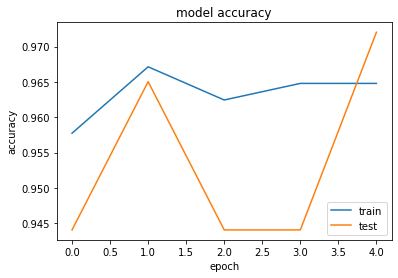

In [197]:
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

history = model.fit(X_train, y_train,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [196]:
# --------------------------------------------------------------------------------------

In [151]:
X = df.drop(['radius_mean'], axis=1)

y= df.radius_mean.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y)  

In [152]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████| 29/29 [00:06<00:00,  4.77it/s]

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
LinearDiscriminantAnalysis       0.87               0.72    None      0.87   
BaggingClassifier                0.90               0.71    None      0.90   
DecisionTreeClassifier           0.89               0.67    None      0.88   
XGBClassifier                    0.92               0.65    None      0.91   
LGBMClassifier                   0.87               0.60    None      0.85   
RandomForestClassifier           0.82               0.54    None      0.80   
ExtraTreesClassifier             0.75               0.54    None      0.74   
GaussianNB                       0.76               0.53    None      0.76   
ExtraTreeClassifier              0.50               0.35    None      0.52   
NearestCentroid                  0.29               0.25    None      0.31   
LogisticRegression               0.35               0.21    None

In [153]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred, average='macro')))

Random Forest Evaluation Metrics
Accuracy: 0.8321678321678322
F1 Score: 0.474505928853755


In [154]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regresstion Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_lr, average='macro')))

Logistic Regresstion Evaluation Metrics
Accuracy: 0.3356643356643357
F1 Score: 0.14909816431555561


In [155]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_xgb)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_xgb, average='macro')))

XGBoost Evaluation Metrics
Accuracy: 0.916083916083916
F1 Score: 0.5857094759991304


In [156]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print('Stochastic Gradient Descent Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_sgd)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_sgd, average='macro')))

Stochastic Gradient Descent Evaluation Metrics
Accuracy: 0.16783216783216784
F1 Score: 0.05209281679869915


In [157]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('K-Nearest Neighbor Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_knn)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_knn, average='macro')))

K-Nearest Neighbor Evaluation Metrics
Accuracy: 0.7972027972027972
F1 Score: 0.49376698279137304


In [159]:
# --------------------------------------------------------------------------------------

In [160]:
X = df.drop(['texture_mean'], axis=1)

y= df.texture_mean.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y)  

In [161]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████| 29/29 [00:08<00:00,  3.47it/s]

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
XGBClassifier                    0.27               0.29    None      0.26   
LinearDiscriminantAnalysis       0.26               0.26    None      0.25   
LogisticRegression               0.22               0.23    None      0.21   
LGBMClassifier                   0.24               0.23    None      0.24   
BaggingClassifier                0.23               0.22    None      0.22   
LinearSVC                        0.19               0.21    None      0.18   
NearestCentroid                  0.14               0.20    None      0.13   
DecisionTreeClassifier           0.17               0.19    None      0.17   
RandomForestClassifier           0.18               0.19    None      0.16   
GaussianNB                       0.12               0.17    None      0.10   
RidgeClassifierCV                0.16               0.15    None

In [162]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred, average='macro')))

Random Forest Evaluation Metrics
Accuracy: 0.20279720279720279
F1 Score: 0.19190226575159822


In [163]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regresstion Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_lr, average='macro')))

Logistic Regresstion Evaluation Metrics
Accuracy: 0.11888111888111888
F1 Score: 0.051767937944408524


In [164]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_xgb)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_xgb, average='macro')))

XGBoost Evaluation Metrics
Accuracy: 0.26573426573426573
F1 Score: 0.26729083874352416


In [165]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print('Stochastic Gradient Descent Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_sgd)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_sgd, average='macro')))

Stochastic Gradient Descent Evaluation Metrics
Accuracy: 0.055944055944055944
F1 Score: 0.008372865275142315


In [166]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('K-Nearest Neighbor Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_knn)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_knn, average='macro')))

K-Nearest Neighbor Evaluation Metrics
Accuracy: 0.07692307692307693
F1 Score: 0.040878080594829364


In [168]:
# --------------------------------------------------------------------------------------

In [169]:
X = df.drop(['perimeter_mean'], axis=1)

y= df.perimeter_mean.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y)  

In [170]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████| 29/29 [00:20<00:00,  1.44it/s]

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
LinearDiscriminantAnalysis       0.50               0.43    None      0.44   
DecisionTreeClassifier           0.25               0.17    None      0.21   
XGBClassifier                    0.24               0.17    None      0.21   
LGBMClassifier                   0.24               0.17    None      0.20   
ExtraTreesClassifier             0.24               0.17    None      0.20   
BaggingClassifier                0.24               0.16    None      0.21   
RandomForestClassifier           0.20               0.13    None      0.16   
ExtraTreeClassifier              0.14               0.11    None      0.14   
GaussianNB                       0.15               0.10    None      0.11   
KNeighborsClassifier             0.06               0.05    None      0.05   
PassiveAggressiveClassifier      0.05               0.05    None

In [171]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred, average='macro')))

Random Forest Evaluation Metrics
Accuracy: 0.22377622377622378
F1 Score: 0.0928428806335783


In [172]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regresstion Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_lr, average='macro')))

Logistic Regresstion Evaluation Metrics
Accuracy: 0.04195804195804196
F1 Score: 0.007587216704863764


In [173]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_xgb)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_xgb, average='macro')))

XGBoost Evaluation Metrics
Accuracy: 0.23776223776223776
F1 Score: 0.12416198180904062


In [174]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print('Stochastic Gradient Descent Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_sgd)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_sgd, average='macro')))

Stochastic Gradient Descent Evaluation Metrics
Accuracy: 0.013986013986013986
F1 Score: 0.0003778932451582428


In [175]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('K-Nearest Neighbor Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_knn)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_knn, average='macro')))

K-Nearest Neighbor Evaluation Metrics
Accuracy: 0.16083916083916083
F1 Score: 0.08910881621724995


In [177]:
# --------------------------------------------------------------------------------------

In [209]:
X = df.drop(['area_mean'], axis=1)

y= df.area_mean.astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y)  

In [179]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████| 29/29 [00:50<00:00,  1.76s/it]

                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
LinearDiscriminantAnalysis       0.07               0.08    None      0.06   
GaussianNB                       0.03               0.03    None      0.01   
LGBMClassifier                   0.02               0.02    None      0.02   
DecisionTreeClassifier           0.01               0.02    None      0.01   
XGBClassifier                    0.01               0.01    None      0.01   
NearestCentroid                  0.01               0.01    None      0.01   
LabelPropagation                 0.01               0.01    None      0.00   
LabelSpreading                   0.01               0.01    None      0.00   
LinearSVC                        0.01               0.01    None      0.00   
ExtraTreesClassifier             0.01               0.00    None      0.01   
LogisticRegression               0.01               0.00    None

In [210]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred, average='macro')))

Random Forest Evaluation Metrics
Accuracy: 0.006993006993006993
F1 Score: 0.003189792663476874


In [211]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regresstion Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_lr, average='macro')))

Logistic Regresstion Evaluation Metrics
Accuracy: 0.0
F1 Score: 0.0


In [182]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_xgb)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_xgb, average='macro')))

XGBoost Evaluation Metrics
Accuracy: 0.013986013986013986
F1 Score: 0.005775577557755775


In [212]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print('Stochastic Gradient Descent Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_sgd)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_sgd, average='macro')))

Stochastic Gradient Descent Evaluation Metrics
Accuracy: 0.0
F1 Score: 0.0


In [213]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('K-Nearest Neighbor Evaluation Metrics')
print('Accuracy: ' + str(metrics.accuracy_score(y_test,y_pred_knn)))
print('F1 Score: ' + str(metrics.f1_score(y_test,y_pred_knn, average='macro')))

K-Nearest Neighbor Evaluation Metrics
Accuracy: 0.0
F1 Score: 0.0
